# Data Visualization

> A picture is worth a thousand words.

In many cases we might want to visualize data instead of just printing results or statistical measures on screen. When wanting to make a presentation, graphs and charts are king. They allow for concise viewing of statistical data, especially when that data involves data sets numbering in the hundreds or more.

## Matplotlib

This package is useful for plotting 2D graphics. It is probably the most used and best supported plotting package in python.

The module we will be using the most is `matplotlib.pyplot`. This module provides a procedural interface to the matplotlib object-oriented plotting library. It is modeled closely after Matlab. Therefore, the majority of plotting commands in pyplot have Matlab analogs with similar arguments.

### Linear plots

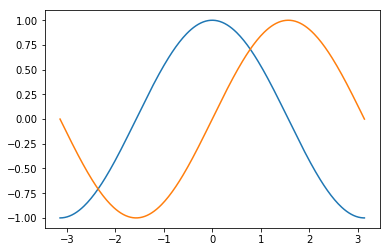

In [1]:
import matplotlib.pyplot as plt  # basic import statement
%matplotlib inline
# this argument is used in the IPython/Jupyter Notebooks.
# It tells is to incorporate the plot in the notebook instead of poping a new window with the plot (which is the default)

# we will need these as well:
import numpy as np
import pandas as pd

x = np.linspace(-np.pi, np.pi, 256, endpoint=True)
# This command returns a numpy.ndarray with 256 values equally distributed in [-pi,pi].
# If endpoint was False the values would be distributed in [-pi,pi).

c, s = np.cos(x), np.sin(x)
# These two commands return the elementwise cos and sin of the array x.

plt.plot(x, c)  # plots the cosine
plt.plot(x, s)  # plots the sine in the same plot
# plt.show()

- If we weren't in the notebook we would also need a `plt.show()` commad at the end.
- If we wanted to save the figure we would use `plt.savefig('plotname.png', dpi=72, bbox_inches='tight')`. Saves the plot in *plotname.png* with 72 dots-per-square-inch. We could also save the figure as a vector image (as a *.pdf*). The `bbox_inches` argument is useful because pyplot leaves a large white box around the image which is often undesirable. 

We can modify the plot above in many ways.

([<matplotlib.axis.YTick at 0x1f9a0bb43c8>,
 <a list of 5 Text yticklabel objects>)

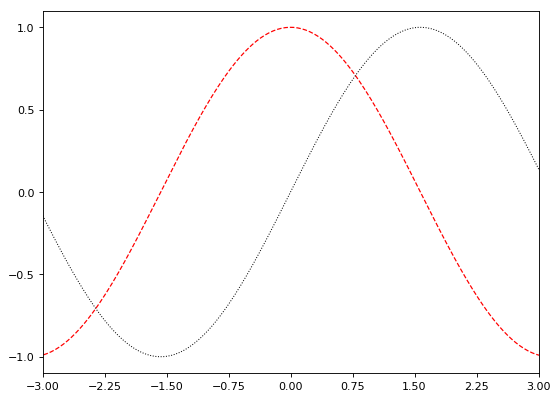

In [2]:
plt.figure(figsize=(8, 6), dpi=80)  # Creates a figure of size 8x6 inches, 80 dots per inch

plt.subplot(1, 1, 1)  # Create a new subplot from a grid of 1x1

plt.plot(x, c, color="red", linewidth=1.1, linestyle="--")
# Plot cosine with a red dashed line of width 1.1
plt.plot(x, s, color="black", linewidth=0.9, linestyle=":")
# Plot sine with a black dotted line of width 0.9

plt.xlim(-3.0, 3.0) # limits the x axis from -3 to +3

# Set x-axis ticks from -3 to +3, 9 in total
plt.xticks(np.linspace(-3, 3, 9, endpoint=True))

# Set y-axis ticks from -1 to +1, 5 in total
plt.yticks(np.linspace(-1, 1, 5, endpoint=True))

Furthermore we can modify the plot by adding a title, axis labels and a legend.

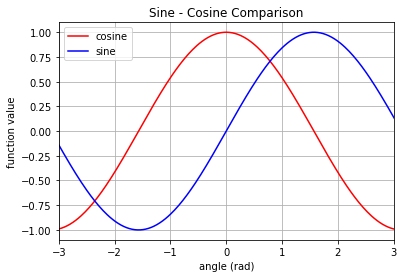

In [3]:
plt.title('Sine - Cosine Comparison')  # adds a title to the plot

plt.xlabel('angle (rad)')  # x axis labels
plt.ylabel('function value')  # y axis labels

plt.grid()  # adds a grid to the plot

plt.xlim(-3.0, 3.0)  # set the limits again

# add a legend
plt.plot(x, c, color="r", label='cosine')
plt.plot(x, s, color="b", label='sine')
plt.legend(['cosine', 'sine'], loc=0)  # loc=0 means 'place it where you think it's best'
# we also modified the lines again to default width/style

We can even **annotate** some points of interest in the figure!

We will use the `plt.scatter ` and the `plt.annotate` arguments for that.

```python
plt.scatter(x, y)
```
This plots points in the figure and takes two arguments. The first is an iterable of the locations of the points on th x-axis. The second is an iterable of the values of those points on the y-axis. Optional arguments are the size of the points, their color, etc.

The points we want to annotate are $cos(\frac{2\pi}{3})$ and $sin(-\frac{2\pi}{3})$.

```python
plt.annotate(text, xy, xytext, arrowprops)
```
- **text** is the text of the annotation.
- **xy** indicates the coordinates we want annotated.
- **xytext** are the coordinates of the text.
- **arrowprops** are the properties of the annotation arrow.

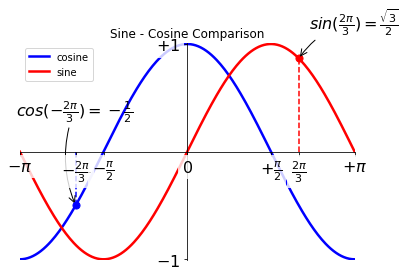

In [4]:
# First we'll plot our two trigonometric functions
plt.title('Sine - Cosine Comparison')
plt.xlim(-3.0, 3.0)
plt.ylim(-1.01, 1.01)
plt.plot(x, c, color="b", linewidth=2.5, label='cosine', zorder=-1)
plt.plot(x, s, color="r", linewidth=2.5, label='sine', zorder=-1)
plt.legend(['cosine', 'sine'], loc=0)

# Customize the axes, by removing surrounding barrier and ticks and ordering them last
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.spines['bottom'].set_zorder(-1)
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
ax.spines['left'].set_zorder(-1)

# Then we take care of the annotations

# Define the points we want annotated on the x-axis
p1 = 2 * np.pi / 3  # point 1
p2 = -p1  # point 2

# Set the axis-ticks 
plt.xticks([-np.pi, p2, -np.pi/2, 0, np.pi/2, p1, np.pi],[r'$-\pi$', r'$-\frac{2\pi}{3}$', r'$-\frac{\pi}{2}$', r'$0$', r'$+\frac{\pi}{2}$', r'$\frac{2\pi}{3}$', r'$+\pi$'])
plt.yticks([-1, +1],[r'$-1$', r'$+1$'])

# Plot those points individually
plt.scatter([p1,], [np.sin(p1),], s=50, c='r', edgecolor='r')  # add point 1 to the plot with color blue
plt.scatter([p2,], [np.cos(p2),], s=50, c='b', edgecolor='b')  # add point 2 to the plot with color red

# Plot a dotted line that shows the point's projection on the x-axis
plt.plot([p1, p1], [0, np.sin(p1)], color='r', linewidth=1.5, linestyle="--")  # add a blue dotted line to point 1
plt.plot([p2, p2], [0, np.cos(p2)], color='b', linewidth=1.5, linestyle="--", zorder=-1)  # add a red dotted line to point 2

# Plot the annotations
plt.annotate(r'$sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',  # we're using a latex math formula as the annotation
             xy=(p1, np.sin(p1)), xycoords='data',  # xy are the coords of the point being annotated,
             # xycoords='data' sets the coordinate system of xy to be the same as the one being used for the data
             xytext=(+10, +30), textcoords='offset points', fontsize=16,  # likewise xytext sets the coords for the text
             # textcoords='offset points' sets the coordinate system as offset from the point (+10, +30) means that the
             # text should begin 10 points to the right and 30 points on top of the point being annotated
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
             # arrowprops takes a dictionary of the properties of the arrow
plt.annotate(r'$cos(-\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(p2, np.cos(p2)), xycoords='data',
             xytext=(-60, +90), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
             zorder=-1)

for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='white', edgecolor='None', alpha=0.8 ))

plt.show()

In [5]:
ax.spines

OrderedDict([('left', <matplotlib.spines.Spine at 0x1f9a0c4ff60>),
             ('right', <matplotlib.spines.Spine at 0x1f9a0c620b8>),
             ('bottom', <matplotlib.spines.Spine at 0x1f9a0c621d0>),
             ('top', <matplotlib.spines.Spine at 0x1f9a0c622e8>)])

### Subplots and scatterplots

Subplots are a way of putting more than one figures in the same plot. Imagine it as a grid (or an array) of graphs. In order to create a subplot we need to specify three things:

- The number of rows, or how many subplots we want to split the image to on the vertical axis.
- The number of columns, or the number of subplots on the vertical axis.
- The index of the current subplot.

These can be either given as a 3-digit number or 3 single digit arguments.

```python
fig1 = plt.subplot(234)  # these two are the
fig1 = plt.subplot(2, 3, 4)  # same thing
```

The above would create a grid of 2-by-3 and place the subplot in the 4th spot:

$$
\left( \begin{array}{ccc}
1 & 2 & 3 \\
\mathbf{4} & 5 & 6 \end{array} \right)
$$

Some examples:

```python
subplot(111)  # means the subplot covers the whole figure

# we split the figure in two (horizontally):
subplot(121)  # left subplot
subplot(122)  # right subplot

# again, we split it in two (vertically):
subplot(211)  # top subplot
subplot(212)  # bottom subplot

# now, we split it in four:
subplot(221)  # top left subplot
subplot(222)  # top right subplot
subplot(223)  # bottom left subplot 
subplot(224)  # bottom right subplot
```

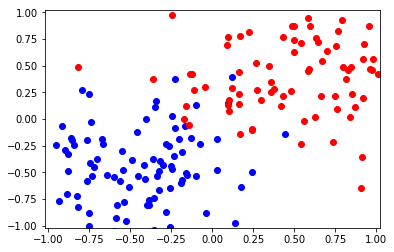

In [6]:
f1 = plt.subplot(111)  # this means that the plot consists of 1 subplot

# First, we'll generate two groups of random points

# (x,y) values of group 1
x1 = list(np.random.normal(-0.5, 0.4, 100))
y1 = list(np.random.normal(-0.5, 0.4, 100))

# (x,y) values of group 2
x2 = list(np.random.normal(0.5, 0.4, 100))
y2 = list(np.random.normal(0.5, 0.4, 100))

plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)

# Now, we'll plot them on a scatterplot

f1.scatter(x1,y1, c='b', edgecolor='b')
f1.scatter(x2,y2, c='r', edgecolor='r')

Let's add a *magnitude* to each of our points in a new *z* axis.

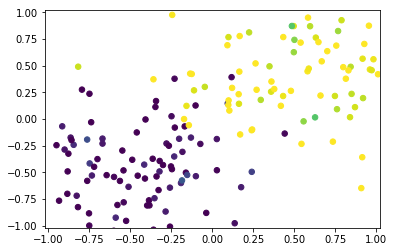

In [7]:
# magnitude of each group
z1 = list(np.random.normal(-1, 0.2, 100))
z2 = list(np.random.normal(1, 0.2, 100))

# And Let's plot this in a new subplot
f2 = plt.subplot(111)

f2.scatter(x1,y1, c=z1, vmin=-1, vmax=1, s=30, edgecolor=None)
f2.scatter(x2,y2, c=z2, vmin=-1, vmax=1, s=30, edgecolor=None)

plt.xlim(-1.02,1.02)
plt.ylim(-1.02,1.02)
plt.show()

The new data takes it's color according to the magnitude. 

The way we did this is that by the three optional arguments in `plt.scatter(c= , vmin= , vmax=, )`. The first argument takes a list of the same size as x and y containing the values according to which we color the points. The other two arguments indicate the minimum and maximum values that *c* expexts. If we want to use a custom colormap (default being the blue -> red), we can do so by the `cmap=` optional argument.

Now, let's try and plot more than one images one figure.

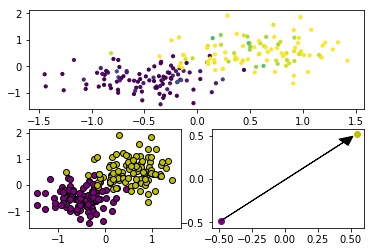

In [8]:
f1 = plt.subplot(223)  # we have two subplots in the second row
f2 = plt.subplot(211)  # but just one in the first row
f3 = plt.subplot(224)

x1m = sum(x1)/len(x1)
y1m = sum(x1)/len(x1)
x2m = sum(x2)/len(x2)
y2m = sum(y2)/len(y2)

f1.scatter(x1,y1, c='purple', edgecolor='black')
f1.scatter(x2,y2, c='y', edgecolor='black')

f2.scatter(x1,y1, c=z1, vmin=-1, vmax=1, s=10)
f2.scatter(x2,y2, c=z2, vmin=-1, vmax=1, s=10)

f3.scatter([x1m,], [y1m,], c='purple', edgecolor='purple')
f3.scatter([x2m,], [y2m,], c='y', edgecolor='y')

f3.arrow(x1m, y1m, abs(x1m) + x2m - 0.1, abs(y1m) + y2m - 0.1, head_width = 0.1, head_length = 0.1, fc='black')

plt.show()

The image on the bottom right shows the means of the two populations with an arrow pointing from one to another. In order to plot the arrow:

```python
plt.arrow(x, y, dx, dy)
```
where *(x,y)* are the starting coordinates, *(dx,dy)* is the shift of the arrow and the rest are optional properties of the arrow.

### Let's see a few more examples

This is mostly a showcase of what matplotlib can do.

First, we'll show a scatter plot that has points with varying sizes and colors.

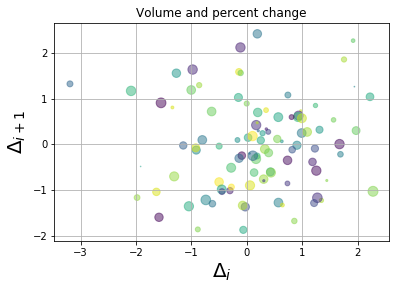

In [9]:
x = list(np.random.normal(0, 1, 100))
y = list(np.random.normal(0, 1, 100))
cl = list(np.random.random_sample((100,)))
sz = list(100 * np.random.random_sample((100,)))

plt.scatter(x, y, c=cl, s=sz, alpha=0.5)  # alpha regulates optacy: 0 = fully transparent, 1 = not transparent at all

plt.xlabel(r'$\Delta_i$', fontsize=20)
plt.ylabel(r'$\Delta_{i+1}$', fontsize=20)
plt.title('Volume and percent change')

plt.grid()

Now, we'll show a scatter plot with a histogram adjacent to it.

(-3.75, 3.75)

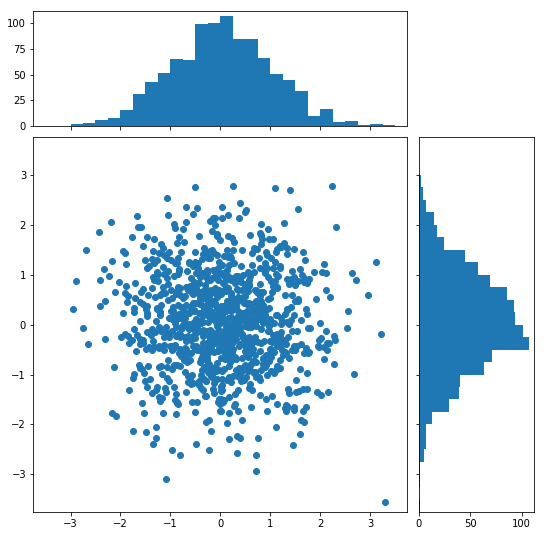

In [10]:
from matplotlib.ticker import NullFormatter

x = np.random.randn(1000)
y = np.random.randn(1000)

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

nullfmt = NullFormatter()  # this is used to remove the ticks from between the figure and the histograms

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)  # scatter plot figure
axHistx = plt.axes(rect_histx)  # histogram on x axes
axHisty = plt.axes(rect_histy)  # histogram on y axes

axHistx.xaxis.set_major_formatter(nullfmt)  # removes the ticks
axHisty.yaxis.set_major_formatter(nullfmt)

axScatter.scatter(x, y)  # scatters the (x,y) random data on the scatterplot

binwidth = 0.25  # the width of each 'bin'
xymax = np.max([np.max(np.fabs(x)), np.max(np.fabs(y))])  # fabs retuns absolute values elementwise
lim = (int(xymax/binwidth) + 1) * binwidth  # set x and y limits

axScatter.set_xlim((-lim, lim))
axScatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
axHistx.hist(x, bins=bins)  # create x-axis histogram
axHisty.hist(y, bins=bins, orientation='horizontal')  # create y-axis histogram

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

## Seaborn

> Seaborn is a visualization library based on matplotlib. It provides a higher-level interface for drawing statistical graphs. It also supports data structures from numpy and pandas and statistical routines from scipy.

In seaborn we can set all the aesthetic parameters in one step. Things like the background, the font, the scale etc, can be set in one line. This is done by the `seaborn.set(...)` function.

Let's see a couple examples.

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


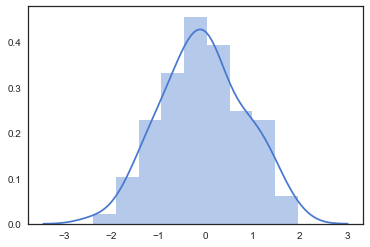

In [11]:
import seaborn as sns

sns.set(style="white", palette="muted", color_codes=True)  # sets aesthetic parameters

d = np.random.normal(size=100)  # random normal 

sns.distplot(d)  # univariate distribution plot

By default `seaborn.distplot()` will draw a histogram and fit a kernel density estimation (KDE). The latter is a non-parametric way to predict the probability density function of a random variable.

Another example we will show is plotting **timeseries** data with bootstrap resampling.

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


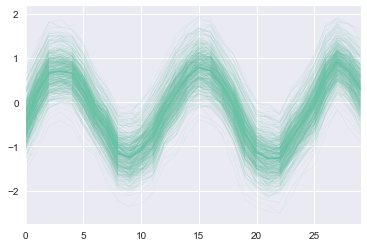

In [12]:
sns.set(style="darkgrid", palette="Set2")

# first we'll create a noisy periodic dataset
curves = [] 
for _ in range(15):
    x = np.linspace(0, 30 / 2, 30) # x-axis
    y = np.sin(x) + np.random.normal(0, 1.5) + np.random.normal(0, .3, 30) # sin(x) + noise from normal distribution
    curves.append(y)
# at this point we have a list of 15 sine-like curves with random noise

# Plot the average over replicates with bootstrap resamples
sns.tsplot(curves, err_style="boot_traces", n_boot=500)
# n_boot is the number of boostrap iterations
# err_style is an aesthetic way of plotting uncertainty

Another example we'll show is plotting marginal distributions. First of all, the function we will be using is the Kendall rank correlation coefficient, which is often referred to by the greek letter tau ($\tau$). Kendall’s tau is a measure of the correspondence between two rankings. We will be calculating this coefficient through the `scipy.stats.kendelltau(x,y)` function. For aesthetic reasons we will be plotting the data on a hexagon-style plot (rather than the plain old scatter plot). Each hexagon will 'bin' the points that fall inside it.

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


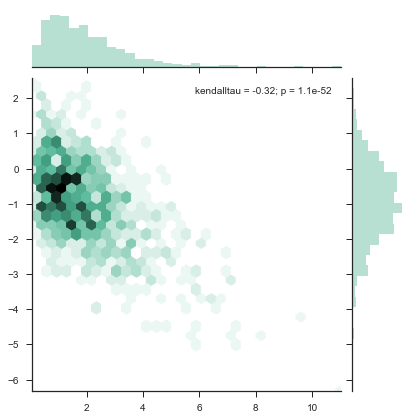

In [13]:
from scipy.stats import kendalltau

sns.set(style="ticks")

x = np.random.gamma(2, size=1000)
y = -.5 * x + np.random.normal(size=1000)

sns.jointplot(x, y, kind="hex", stat_func=kendalltau, color="#4CB391")

There are hundreds of plot styles we can chose from in both matplotlib and seaborn. Most of the times, presenting the results is just as important as generating them. Take your time and familiarize with the different plotting techniques and styles out there.

Now that we've gone showcasing several of matplotlib and seaborn's capabilities we can see how it's used in practice.

# Exploratory Data Analysis

In the previous session we saw how we can perform EDA with the pandas library. However, EDA isn't complete unless we can visualize our data. First, let's see an example of **why** data visualization in necessary in EDA. The data we are going to use are called the [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).

> Anscombe's quartet comprises four datasets that have nearly identical simple descriptive statistics, yet appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers on statistical properties.

In [14]:
quartet = sns.load_dataset('anscombe')

# create new columns for statistical descriptions
for num in quartet.dataset.unique():
    quartet[str(num) + 'x'] = quartet[quartet.dataset == str(num)].x
    quartet[str(num) + 'y'] = quartet[quartet.dataset == str(num)].y

Let's try to describe these four different datasets, using **just** their statistical characteristics:

In [15]:
quartet.loc[:, ['Ix', 'IIx', 'IIIx', 'IVx']].describe()

,Ix,IIx,IIIx,IVx
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625
min,4.000000,4.000000,4.000000,8.000000
25%,6.500000,6.500000,6.500000,8.000000
50%,9.000000,9.000000,9.000000,8.000000
75%,11.500000,11.500000,11.500000,8.000000
max,14.000000,14.000000,14.000000,19.000000


In [16]:
quartet.loc[:, ['Iy', 'IIy', 'IIIy', 'IVy']].describe()

,Iy,IIy,IIIy,IVy
count,11.000000,11.000000,11.000000,11.000000
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579
min,4.260000,3.100000,5.390000,5.250000
25%,6.315000,6.695000,6.250000,6.170000
50%,7.580000,8.140000,7.110000,7.040000
75%,8.570000,8.950000,7.980000,8.190000
max,10.840000,9.260000,12.740000,12.500000


These four datasets share virtually the same basic statistical characteristics, but if we plot them, we'll see that they are indeed very different.

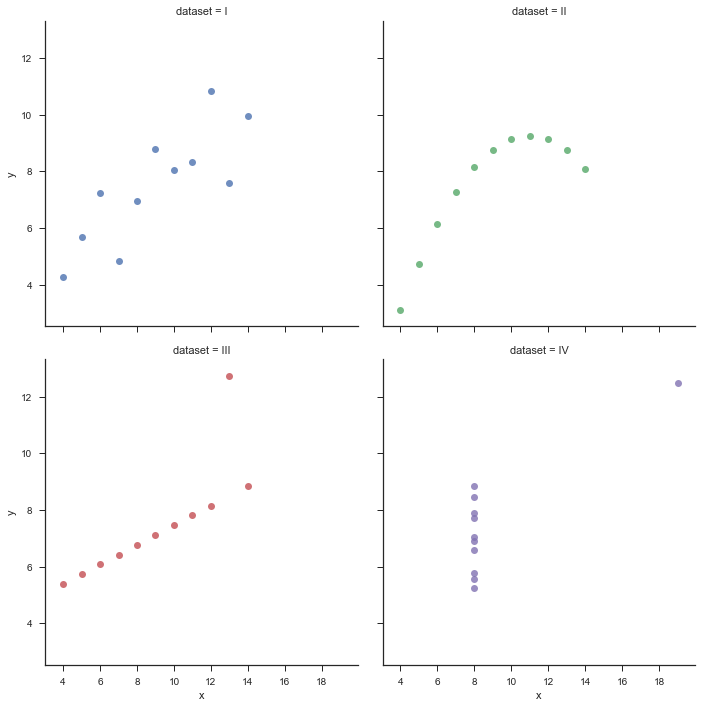

In [17]:
sns.lmplot(x='x', y='y', col='dataset', hue='dataset', data=quartet, col_wrap=2, fit_reg=False)

This is an extreme example, but it shows that we can't rely solely on descriptive statistics when performing an EDA. We almost always need to visualize our data!

Let's import a [dataset](http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names) describing automobile sales.

In [18]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', header=None)

df.columns = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
              'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 
              'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore',
              'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

# Remove NaN values:
df = df.applymap(lambda x: x if '?' not in str(x) else np.nan)
df = df.dropna()

print(df.shape)
df.head()

(159, 26)


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


When dealing with **numerical** (continuous) variables, a good practice is to visualize their distribution. 

Average age: 9583.65%
Standard deviation: 3071.86%
Skewness: 91.67%
Kurtosis: 29.89%


c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(105.42,0.015694,'mean')

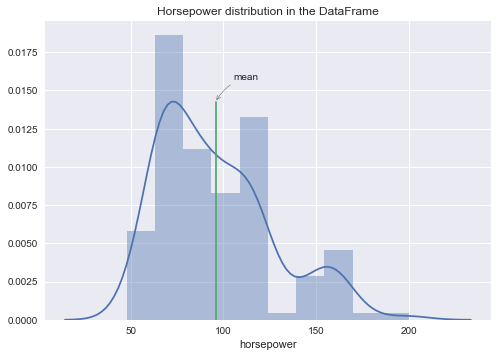

In [19]:
plt.style.use('seaborn')  # use different plot style
# we can view available styles by: print(plt.style.available)

df.horsepower = df.horsepower.astype(int)  # cast column as integer

# Statistical information:
print('Average age: {:.2f}%'.format(df.horsepower.mean()*100))
print('Standard deviation: {:.2f}%'.format(df.horsepower.std()*100))
print('Skewness: {:.2f}%'.format(df.horsepower.skew()*100))
print('Kurtosis: {:.2f}%'.format(df.horsepower.kurtosis()*100))

# Distplot:
ax = sns.distplot(df.horsepower)

# Auxiliary information:
mn = df.horsepower.mean()
mx = ax.lines[0].get_ydata().max()

# Plot median line:
ax.plot([mn]*2, [0, mx])

# Title:
ax.set_title('Horsepower distribution in the DataFrame')

# Annotation:
plt.annotate('mean', [mn, mx],  xytext=[mn*1.1, mx*1.1], fontsize=10,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2", color='black'))

From the above plot we can easily see several of the properties of a specific variable, such as the positive skewness, the high number of samples between the 75-125 range, the low representation of the 130hp range, etc.

We can also view the correlation between two variables through a scatterplot.

Correlation: 0.8120726263087286


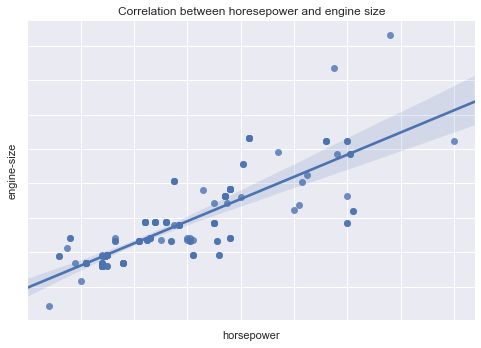

In [20]:
df['engine-size'] = df['engine-size'].astype(int)

# Plot:
ax = sns.regplot(x='horsepower', y='engine-size', data=df)  # this syntax allows us to select the DataFrame's variables by name
ax.set_xticklabels(['']*df.shape[0])  # remove axis labels
ax.set_yticklabels(['']*df.shape[0])
ax.set_title('Correlation between horesepower and engine size')

# Calculate correlation:
print('Correlation:', df.corr()['horsepower']['engine-size'])

This is a special kind of scatterplot that fits a linear regression to data. The positive correlation between the two variables is apparent through this plot.

**Bonus**:

To view if the correlation is statistically significant we have to run our own linear regression on these two variables.

In [21]:
import scipy

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df.horsepower, df['engine-size'])

print('r:', r_value)
print('p:', p_value)

r: 0.8120726263087285
p: 1.4699668393890564e-38


## Exercise 1:

Do the same thing as above for the pair `horsepower` - `price`. Determine if they are correlated.

## Solution

Correlation: 0.7598739453801002


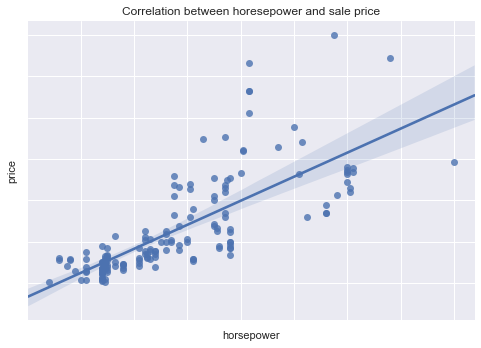

In [22]:
df.price = df.price.astype(int)  # we need to cast this as an int as well

ax = sns.regplot(x='horsepower', y='price', data=df)
ax.set_xticklabels(['']*df.shape[0])
ax.set_yticklabels(['']*df.shape[0])
ax.set_title('Correlation between horesepower and sale price')

print('Correlation:', df.corr()['horsepower']['price'])

When dealing with **categorical** variables. The first thing we want to do is to draw a bar plot, to view their distribution.

Text(0,0.5,'Number of samples')

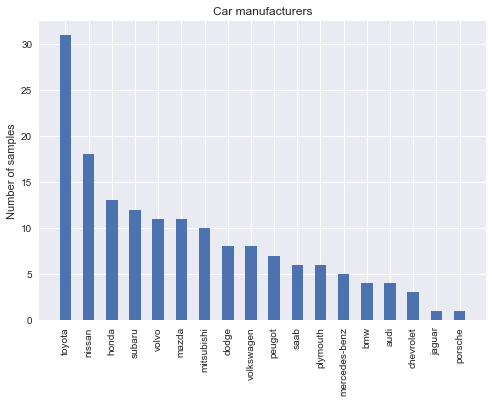

In [23]:
plt.bar(x=pd.value_counts(df.make).keys(), height=pd.value_counts(df.make),
        width=0.5)
plt.xticks(rotation='vertical')
plt.title('Car manufacturers')
plt.ylabel('Number of samples')

We can also see how two variables (one categorical and one numeric) are correlated this way.

Text(0.5,1,'Price per car manufacturer')

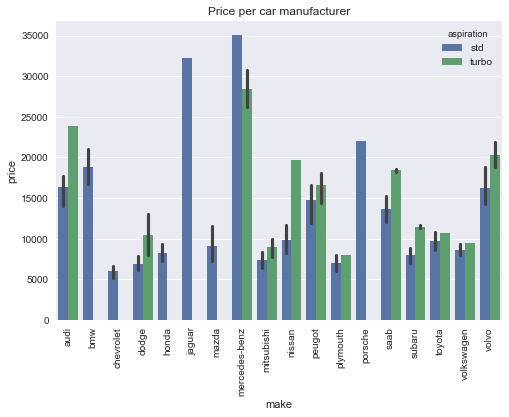

In [24]:
sns.barplot(x='make', y='price', hue='aspiration', data=df)
plt.xticks(rotation='vertical')
plt.title('Price per car manufacturer')

Another excellent chart carrying a lot of information is the violinplot.

Text(0.5,1,'Price per body type')

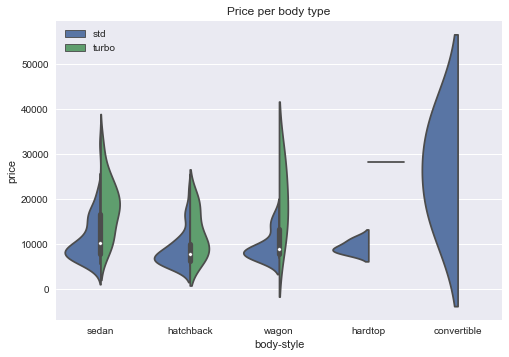

In [25]:
sns.violinplot(x='body-style', y='price', hue='aspiration', data=df, split=True)
plt.legend(loc='upper left')
plt.title('Price per body type')

Besides the information presented through the barplot, the violinplot also depicts the distribution of each variable. The two variables on the right are half, because we only have 1 and 0 samples for those categories.

Another very popular way to visualize a variable is the pie chart. This is typically used when wanting to visualize a comparison between each category and a total (e.g. the proportion of the number of samples each category has with the total number of samples). When wanting to compare variables with each other it's best to use a bar plot.

Text(0.5,1,'Number of cylinders')

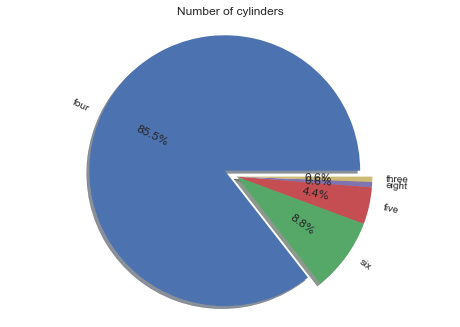

In [26]:
labels = pd.value_counts(df['num-of-cylinders']).keys()
sizes = pd.value_counts(df['num-of-cylinders'])

# Explode the most frequent category:
explode = [0] * len(sizes)
explode[np.argmax(list(sizes))] = 0.1

# Draw pie chart
properties = plt.pie(sizes, labels=labels, explode=explode, shadow=True, startangle=0, autopct='%1.1f%%')

# Rotate labels:
# [0] = wedges, [1] = labels, [2] = fractions
for i in range(len(properties[0])):
    angle = (properties[0][i].theta2 + properties[0][i].theta1) / 2  # find angle in the position of the label
    if angle < 180:  # rotate upside down labels
        angle = angle - 180
    properties[1][i].set_rotation(angle)  # set label rotation
    properties[2][i].set_rotation(angle)  # set fraction rotation
    
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Number of cylinders')

We can also compare two categorical variables. Let's visualize the number of samples depending on the number of doors and the car manufacturer.

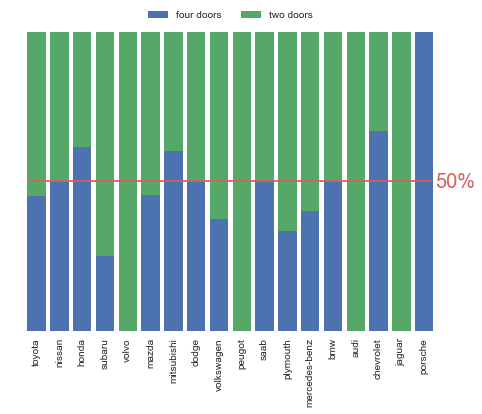

In [27]:
d = pd.value_counts(df.make)  # count the total number of samples each car manufacturer has
d2 = pd.value_counts(df[df['num-of-doors'] == 'two'].make)  # count the number of samples for cars with two doors
d2 /= d  # normalize to 0-1
d2 = d2[d.keys()].fillna(0)  # get all categories and fill missing ones with 0
d4 = pd.value_counts(df[df['num-of-doors'] == 'four'].make)  # count the number of samples for cars with four doors
d4 /= d
d4 = d4[d.keys()].fillna(0)

plt.bar(d2.keys(), d2, label='four doors')
plt.bar(d4.keys(), d4, bottom=d2, label='two doors')  # stack the second bar plot on top of the first

plt.plot([-0.38,17.35], [0.5,0.5], c='r') # add line
plt.text(17.5, 0.48, '50%', color='r', fontsize=20) # add text

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)  # put the legend outside the plot
plt.xticks(rotation='vertical')
ax = plt.gca()
ax.set_facecolor('white')  # make the background white
ax.get_yaxis().set_visible(False)  # remove y axis

We can also visualize the relationship the above two variables have with the price.

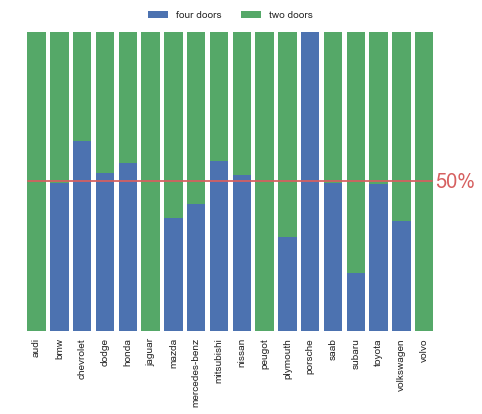

In [28]:
dd = pd.pivot_table(df, values='price', index=['num-of-doors', 'make'], aggfunc='sum')
# Create a pivot table with the two variables we want to visualize as indexes and the target variable as columns
# Note that we want to aggregate according to the sum of the variables (not the mean)
d2 = dd.loc['two'].reindex(dd.index.levels[1]).fillna(0)['price']  # add missing categories and fill them with 0
d2 /= pd.pivot_table(df, values='price', index='make', aggfunc='sum')['price']  # normalize to 0-1
d4 = dd.loc['four'].reindex(dd.index.levels[1]).fillna(0)['price']
d4 /= pd.pivot_table(df, values='price', index='make', aggfunc='sum')['price']

plt.bar(d2.keys(), d2, label='four doors')
plt.bar(d4.keys(), d4, bottom=d2, label='two doors')
plt.xticks(rotation='vertical')

plt.plot([-0.38,17.35], [0.5,0.5], c='r')
plt.text(17.5, 0.48, '50%', color='r', fontsize=20)

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), ncol=2)
plt.xticks(rotation='vertical')
ax = plt.gca()
ax.set_facecolor('white')
ax.get_yaxis().set_visible(False)

Another way to visualize the same thing is through a heatmap.

Text(0.5,29.5,'number of doors')

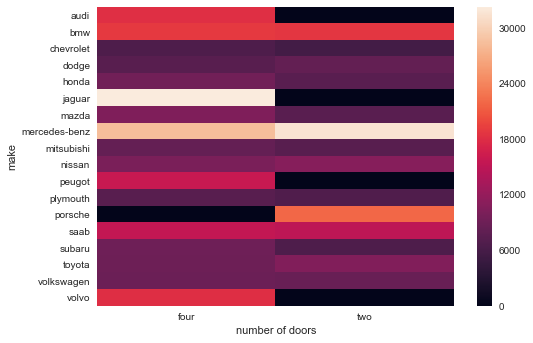

In [29]:
# Do the same thing as before without normalization.
# I can't make it work the easy way: df.pivot('make', 'num-of-doors', 'price')
dd = pd.pivot_table(df, values='price', index=['num-of-doors', 'make'], aggfunc='mean')  # mean aggrigation this time
d2 = dd.loc['two'].reindex(dd.index.levels[1]).fillna(0)['price']
d4 = dd.loc['four'].reindex(dd.index.levels[1]).fillna(0)['price']

sns.heatmap(pd.DataFrame({'two':d2, 'four':d4}))
plt.xlabel('number of doors')

If we have multiple variables we want plotted in pairs, we can generate a pairplot.

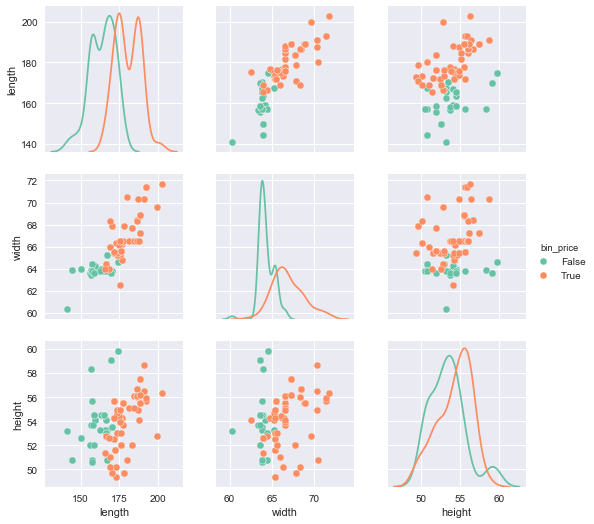

In [30]:
df['bin_price'] = df.price > df.price.median()
sns.pairplot(df, x_vars=['length', 'width', 'height'], y_vars=['length', 'width', 'height'],
             hue='bin_price', diag_kind='kde', palette='Set2')

These are especially important when our dataset contains a limited number of variables and we want to view the relatioship between them and how they relate to the target variable.

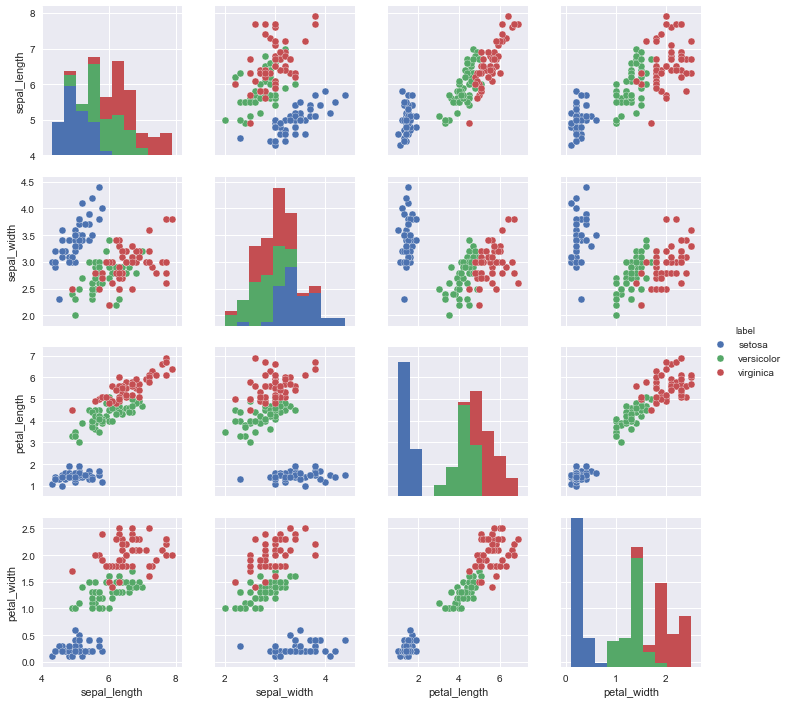

In [31]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(url, header=None)
iris.columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
iris.label = iris.label.map(lambda x: x.replace('Iris-', ''))
sns.pairplot(iris, hue='label')